In [1]:
import pandas as pd

In [13]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)

In [14]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [15]:
data.shape # pandas data frame shape

(200, 4)

In [28]:
import seaborn as sns
%matplotlib inline

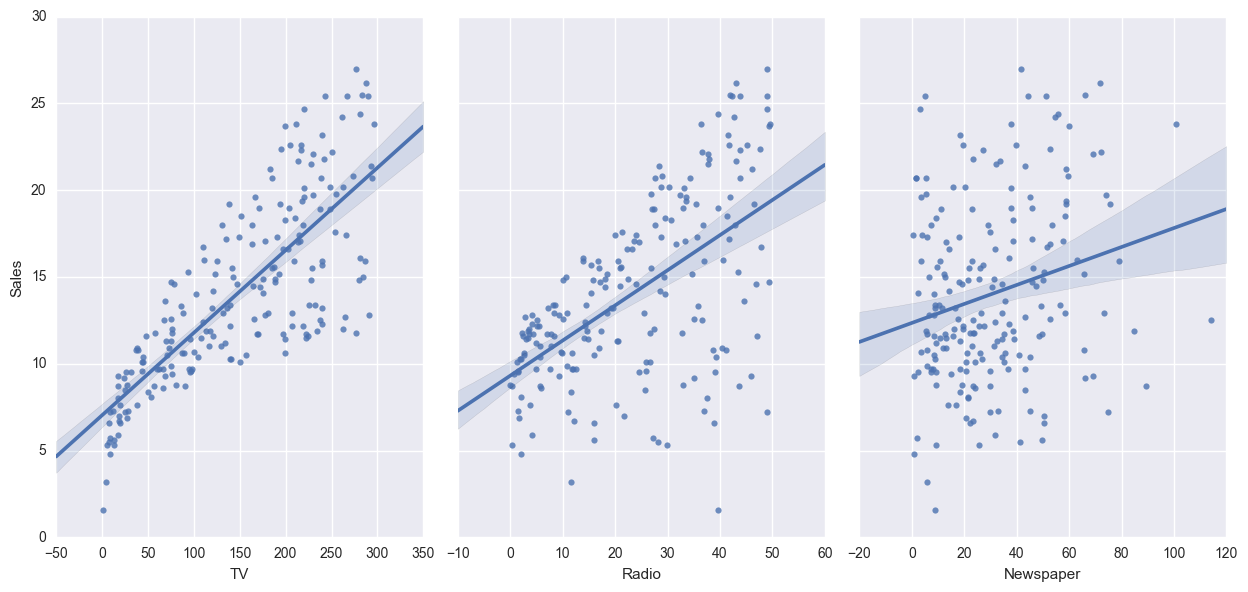

In [33]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=6, aspect=0.7, kind='reg')
# Show best fit and a 95% confidence band

In [34]:
# Regression = a prediction problem with continuous response.
# Linear regression is a particular type of model.

In [65]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [66]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [67]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# 25% test by default

In [76]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.intercept_) # underscore denotes an estimated attribute
list(zip(feature_cols, linreg.coef_)) 

2.87696662232


[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804065)]

In [77]:
y_pred =linreg.predict(X_test)

In [78]:
from sklearn import metrics

In [80]:
print(metrics.mean_absolute_error(y_test, y_pred))

1.06689170826


In [87]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# RMSE – root mean square error.
# MAE – easiest to understand, MSE punishes larger errors, RMSE interpretable in y.
# "It is important to punish larger errors in the real world apps!"

1.40465142303


In [94]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


In [95]:
# Slightly better!